## **pyTopoComplexity**
### **Example for using `CWTMexHat` from `pycwtmexhat.py` to perform two-dimensional continuous wavelet transform analysis** 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GeoLarryLai/pyTopoComplexity/blob/main/Example_pycwtmexhat.ipynb)

The `CWTMexHat` performs a **two-dimensional continuous wavelet transform (2D-CWT) using a Mexican Hat wavelet (i.e., Ricker wavelet)** to measure the topographic complexity (i.e., surface roughness) of a land surface. This method quantifies the wavelet-based curvature of the surface, which has been proposed as an effective geomorphic metric for the relative age dating of deep-seated landslide deposits. It allows for a rapid assessment of landslide frequency and spatiotemporal patterns over large areas.

The original MATLAB code was developed by Dr. Adam M. Booth (Portland State University) and used in Booth et al. (2009) and Booth et al. (2017). This MATLAB code (available from [Dr. Booth's personal website](https://web.pdx.edu/~boothad/tools.html)) was later revised and adapted by Dr. Sean R. LaHusen (University of Washington) and Dr. Erich N. Herzig (University of Washington) for their research (e.g., LaHusen et al., 2020; Herzig et al., 2023), following the mathemical approach described below. Since November 2023, Dr. Larry Syu-Heng Lai (University of Washington) has translated the code into an open-source Python version, with continuous optimizations. The current code can automatically detect the grid spacing (i.e., grid size, $\Delta$) and the unit of XYZ direction in the input Digital Elevation Model (DEM) raster, allowing it to compute 2D-CWT results using the appropriate wavelet scale factor (s) at a designated Mexican Hat wavelength ($\lambda$).

The example GeoTIFF rasters include lidar Digital Elevation Model (DEM) files that cover the area affected by a deep-seated landslide that occurred in 2014 in the Oso area of the North Fork Stillaguamish River valley, Washington State, USA (Washington Geological Survey, 2023). These example DEMs vary in grid spacing (i.e., grid size), coordinate reference system (CRS), and unit of grid value (elevation, Z).

Archives of codes and example DEM data:
* Zenodo: https://doi.org/10.5281/zenodo.11239338
* Github repository: https://github.com/GeoLarryLai/pyTopoComplexity
<hr>

### **Theory**

The 2D-CWT method provides detailed information on how amplitude is distributed across spatial frequencies at each position in the data by transforming spatial data into position-frequency space. The 2D-CWT is computed by convolving the elevation data $z$ with a wavelet family $\psi$, using a wavelet scale parameter $s$ at every location ($x$, $y$):

$$
C (s, x, y) = \Delta^2 \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} z(x, y) \psi \left( x, y \right) dx \, dy
$$

, where the resultant wavelet coefficient $C(s,x,y)$ provides a measure of how well the wavelet $\psi$ matches the data $z$ at each grid point (Torrence and Compo, 1998). Unlike other techniques that use moving windows to detect regional topographic complexity, the 2D-CWT method stands out by isolating specific landform features at the scale of the designated wavelength while filtering out noise from terrain variations at longer or shorter wavelengths. When $s$ is large, $\psi$ is spread out, capturing long-wavelength features of $z$; when $s$ is small, $\psi$ becomes more localized, making it sensitive to fine-scale features of $z$. In this implementation, we use the 2D Ricker or Marr wavelet (i.e., Mexican hat wavelet) function to define $\psi$:


$$
\psi = − \frac{1}{\pi(s\Delta)^4}(1-\frac{𝑥^2+𝑦^2}{2s^2})e^{(-\frac{𝑥^2+𝑦^2}{2s^2})}
\:\:\:\:\:\:\:\:\:
\lambda=\frac{2\pi s}{\sqrt{5/2}}\Delta
$$

The Mexican hat wavelet, as defined above, corresponds to the second derivative of a Gaussian envelope. Its Fourier wavelength ($\lambda$) 
depends on the chosen wavelet scale ($s$) and the grid spacing ($\Delta$) of the input DTM raster. The wavelet function $\psi$ is scaled based on the wavelet scale parameter $s$ and the grid spacing $\Delta$, ensuring that the resultant wavelet coefficient $C$ represents concave and convex landforms according to the wavelet scale $s$.

We note that the equations for $C$ and $\psi$ presented here are mathematical approaches adapted in later publications (e.g., LaHusen et al., 2020; Herzig et al., 2023) and ongoing works on landslide mapping and age dating studies. There are minor differences in the proportionality constant used to define $\psi$ and the conventions used to present the magnitude of the wavelet coefficients $C$, compared to earlier similar research by Booth et al. (2009). These differences in mathematical approach will by definition result in $C$ values in different units and order of magnitude (e.g., $10^{-3}$ to $10^{-4}$ [m$^{-2}$] in Booth et al. (2017) and prior studies; $10^{-2}$ to $10^{-3}$ [m$^{-1}$] in LaHusen et al. (2020) thereafter).

Despite this discrepency, the $C$ values yielded from these two approaches are linearly scaled and interconvertible, and they both reflect identical spatiotemporal patterns of topographic complexity (i.e., surface roughness). 
<hr>

### **References**
##### Journal Articles: 
* Booth, A.M., LaHusen, S.R., Duvall, A.R., Montgomery, D.R., 2017. Holocene history of deep-seated landsliding in the North Fork Stillaguamish River valley from surface roughness analysis, radiocarbon dating, and numerical landscape evolution modeling. Journal of Geophysical Research: Earth Surface 122, 456-472. https://doi.org/10.1002/2016JF003934 
* Booth, A.M., Roering, J.J., Perron, J.T., 2009. Automated landslide mapping using spectral analysis and high-resolution topographic data: Puget Sound lowlands, Washington, and Portland Hills, Oregon. Geomorphology 109, 132-147. https://doi.org/10.1016/j.geomorph.2009.02.027   
* Herzig, E.N., Duvall, A.R., Booth, A.R., Stone, I., Wirth, E., LaHusen, S.R., Wartman, J., Grant, A., 2023. Evidence of Seattle Fault Earthquakes from Patterns in Deep‐Seated Landslides. Bulletin of the Seismological Society of America. https://doi.org/10.1785/0120230079 
* LaHusen, S.R., Duvall, A.R., Booth, A.M., Grant, A., Mishkin, B.A., Montgomery, D.R., Struble, W., Roering, J.J., Wartman, J., 2020. Rainfall triggers more deep-seated landslides than Cascadia earthquakes in the Oregon Coast Range, USA. Science Advances 6, eaba6790. https://doi.org/10.1126/sciadv.aba6790  
* Torrence, C., Compo, G.P., 1998. A practical guide to wavelet analysis. Bulletin of the American Meteorological Society 79 (1), 61–78.

##### Digital Elevation Model (DEM) Examples:
* Washington Geological Survey, 2023. 'Stillaguamish 2014' project [lidar data]: originally contracted by Washington State Department of Transportation (WSDOT). [accessed April 4, 2024, at http://lidarportal.dnr.wa.gov]
<hr>

#### **0. Import packages**
##### Check installation of pyTopoComplexity

In [39]:
!pip install pytopocomplexity

##### Import packages
Import the `CWTMexHat` class from the *pycwtmexhat.py* module.

In [40]:
import os
from pytopocomplexity import CWTMexHat

##### Read docstring of CWTMexHat

In [41]:
help(CWTMexHat)

Help on class CWTMexHat in module pytopocomplexity.pycwtmexhat:

class CWTMexHat(builtins.object)
 |  CWTMexHat(Lambda)
 |
 |  A class for performing 2D Continuous Wavelet Transform (CWT) analysis using a Mexican Hat wavelet.
 |
 |  This class implements the 2D-CWT method to measure topographic complexity (surface roughness)
 |  of a land surface from a Digital Elevation Model (DEM). The method quantifies the wavelet-based
 |  curvature of the surface, which has been proposed as an effective geomorphic metric for
 |  identifying and estimating the ages of historical deep-seated landslide deposits.
 |
 |  Required parameters:
 |  -----------
 |  Lambda : float
 |      The wavelength (in meters) for the Mexican Hat wavelet.
 |  input_dir : str
 |      Path and filename of the input DEM file.
 |  output_dir : str
 |      Path and filename to save the output GeoTIFF file.
 |
 |  Attributes:
 |  -----------
 |  Lambda : float
 |      The wavelength (in meters) for the Mexican Hat wavelet.
 

##### Define the directory of the input example DEM raster

Available LiDAR DEM files:
* **Ososlid2014_f_3ftgrid.tif**
    * CRS: NAD83/Washington South (ftUS) (EPSG: 2286)
    * XY Grid Size: 3.0 [US survey feet]
    * Z Unit: US survey feet
* **Ososlid2014_m_3ftgrid.tif**
    * CRS: NAD83/Washington South (EPSG: 32149)
    * XY Grid Size: ~0.9144 [meters]
    * Z Unit: meters
* **Ososlid2014_f_6ftgrid.tif**
    * CRS: NAD83/Washington South (ftUS) (EPSG: 2286)
    * XY Grid Size: 6.0 [US survey feet]
    * Z Unit: US survey feet
* **Ososlid2014_m_6ftgrid.tif**
    * CRS: NAD83/Washington South (EPSG: 32149)
    * XY Grid Size: ~1.8288 [meters]
    * Z Unit: meters

If the directory doesn't exist, the code will download the example DEM file from the pyTopoComplexity Github repository. 

In [42]:
# Define input file name and directory
base_dir = os.path.join(os.getcwd(), 'ExampleDEM') # input file base directory
input_file = 'Ososlid2014_f_6ftgrid.tif'           # input file name
input_dir = os.path.join(base_dir, input_file)     # input file directory

# Check if base file directory exists. If not, create it
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Define the download URL if the example file does not exist in the base_dir
download_url = "https://github.com/GeoLarryLai/pyTopoComplexity/raw/main/ExampleDEM/" + input_file

# Check if file exists, if not, download it
if not os.path.exists(input_dir):
    try:
        import requests
        response = requests.get(download_url)
        response.raise_for_status()  # Raise an exception for 4XX/5XX responses
        with open(input_dir, 'wb') as f:
            f.write(response.content)
        print(f"Example DEM file {input_file} downloaded to {base_dir}")
    except requests.exceptions.RequestException as e:
        print(f"The file {input_file} does not exist locally or on the GitHub repository.\n{e}")
        raise SystemExit(1)
else:
    print(f"Example DEM file {input_file} already exist in the {base_dir}")

Example DEM file Ososlid2014_f_6ftgrid.tif already exist in the /Users/larryslai/Library/CloudStorage/Dropbox/My Documents/Paper manuscripts/2025-pyTopoComplexity/pyTopoComplexity/ExampleDEM


<hr>

#### **1. Instatiate `CWTMexHat` component**
**Parameters:**
* `Lambda`: desired value for the Mexican Hat Fourier wavelength $\lambda$ (in meters) **User must specify a desired value for the Mexican Hat Fourier wavelength $\lambda$ (in meters)** in order to calculate grid spacing $\Delta$ and wavelet scale $s$ for analysis. A larger $\lambda$ will capture broader-scale topographic features, while a smaller $\lambda$ will highlight more local variations.

In [43]:
# Instantiate pycwtmexhat component
Lambda = 15

cwt = CWTMexHat(
    Lambda=Lambda
    )

<hr>

#### **2. Run 2D-CWT analysis**
The `analyze` function will compute the 2D-CWT result for the given Lambda value. 

**Parameters:**
* `input_dir`: file directory to the input DEM raster. 
* `conv_method` *[optional]*: method used for 2D-CWT convolution. The module can use two modules from the **numpy** packages to conduct 2D-CWT convolution, either the conventional way of is using **convolve2d** module, or through a much faster way - Fast Fourier Transform (FFT) method - using **fftconvolve** module. Users can choose the method by setting the parameter `conv_method = 'conv'` or `conv_method = 'fft'`(default) respectively.
* `chunk_processing` *[optional]*: whether to use chunk-processing optimization, either True (default) or False, to mitigate the RAM outage issues when handling a large raster file. Users may also choose to turn on or off the chunk-processing optimization through the parameter `chunk_processing=True`(default) or `chunk_processing=False`. 
* `chunksize` *[optional]*: size of each chunk for chunk-processing, default is (512,512). When chunk-processing is on, user can specify the desired chunk size to optimize the performance on your local machine. Users can choose a smaller chunksize for never loading the entire DEM into memory, alleviating the RAM issues when handling large GeoTIFF files with relatively limited memory. However, the performance could be impacted (required much more processing time) due to the overhead of reading and writing in chunks.

**Outputs:**
* `Z`: the array of input elevation data
* `2D-CWT_result`: the result array of 2D-CWT calculation

***Notes:***
If the input DEM raster include grids that contain uncommonly/errorenously created no-data values, the <code>fftconvolve</code> package used in the <code>conv2_mexh</code> function will return empty result in that chunk with an error message *"RuntimeWarning: invalid value encountered in multiply ret = ifft(sp1 * sp2, fshape, axes=axes)"*. The function will still proceed to process the rest of the chunks, resulting a raster with empty squares. In this case, users may switch to the conventional <code>convolve2d</code> convolution package in the <code>conv2_mexh</code>, which will significantlly increase the processing time.

In [44]:
# Run the analysis with pycwtmexhat module
_, _ = cwt.analyze(
    input_dir, 
    conv_method='fft', 
    chunk_processing=True, 
    chunksize=(512,512)
    )
# The function can return 'Z' and '2D-CWT_result'

[########################################] | 100% Completed | 106.98 ms


<hr>

#### **3. Export results**
The `export_result` function will save the output as a new GeoTIFF raster in the same folder as your input raster.

**Parameters:**
* `output_dir`: Specify the directory to save the output GeoTIFF file.

In [45]:
# Define output file name and file directory
output_file = os.path.splitext(input_file)[0] + f'_pyCWTMexHat({Lambda}m).tif'
output_dir = os.path.join(base_dir, output_file)

# Export result geotiff
cwt.export_result(output_dir)

'Ososlid2014_f_6ftgrid_pyCWTMexHat(15m).tif' is saved


<hr>

#### **4. Display results**
The `plot_result` function can plot the hillshade map of the original DEM and the 2D-CWT result.

**Parameters:**
* `output_dir` *[optional]*: Specify the directory to save the output figure. If it is not specified, the figure will be saved into the same file's directory as your input raster.
* `savefig` *[optional]*: When `savefig = True`, the `plot_result` function will save the output figure in the same folder as your input raster file.
* `figshow` *[optional]*: When `figshow = True`, the `plot_result` function will display the output figure on the screen.
* `showhillshade` *[optional]*: When `showhillshade = True`, the `plot_result` function will display the hillshade plot alongside the roughness data.
* `cwtcolormax` *[optional]*: Maximum value for roughness color scale. If not specified, the code will automatically find the most suitable value for the 2D-CWT raster file.


Figure saved as 'Ososlid2014_f_6ftgrid_pyCWTMexHat(15m).png'


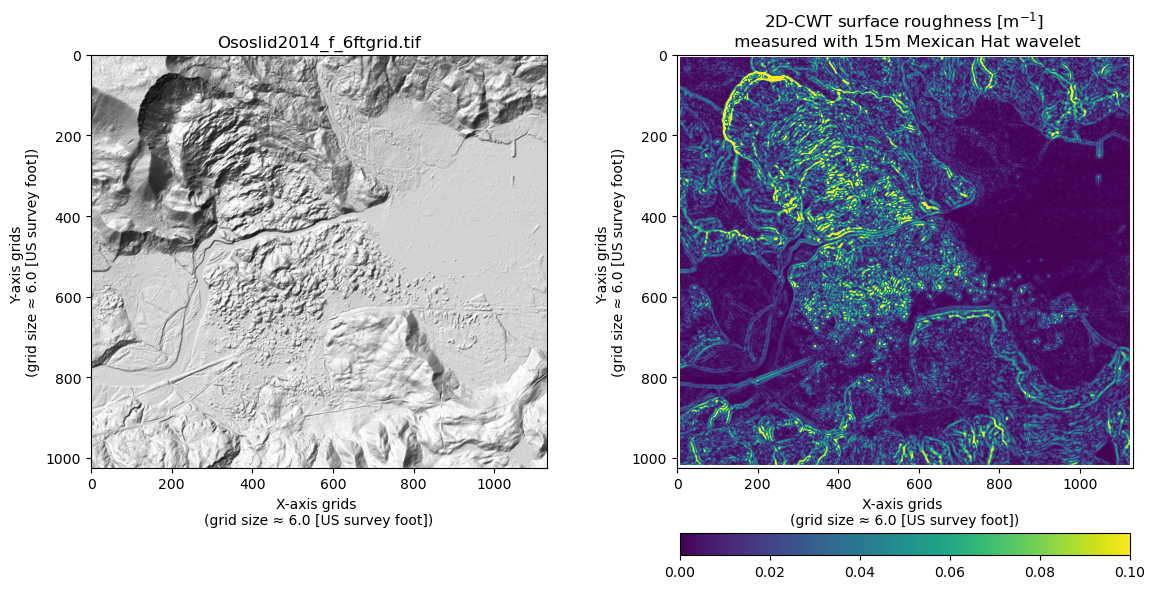

In [46]:
# Plot and save the result figures
cwt.plot_result(
    output_dir=None,
    savefig=True, 
    figshow=True, 
    showhillshade=True,
    cwtcolormax=None
    )